### Part 1 : ดาวน์โหลด dataset ชื่อ credit-g จาก openml โดยใช้คําสั่ง fetch_openml(‘credit-g’) ที่อยู่ใน sklearn.datasets พร้อมแสดงตัวอย่างข้อมูลสามารถเข้าไปดูคําอธิบายข้อมูลได้จาก  
https://www.openml.org/d/31

In [1]:
from sklearn.datasets import fetch_openml
credit_data = fetch_openml('credit-g')

c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(


### Part 2 : Visualize การกระจายตัวของข้อมูลที่เป็นตัวเลขต่อเนื่อง (continuous features) และการกระจายตัวของข้อมูลที่เป็นtarget

In [2]:
credit_data.feature_names

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [3]:
credit_data.categories

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

credit_dataframe = pd.DataFrame(credit_data.data, columns=credit_data.feature_names)
credit_dataframe['class'] = credit_data.target

credit_dataframe.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


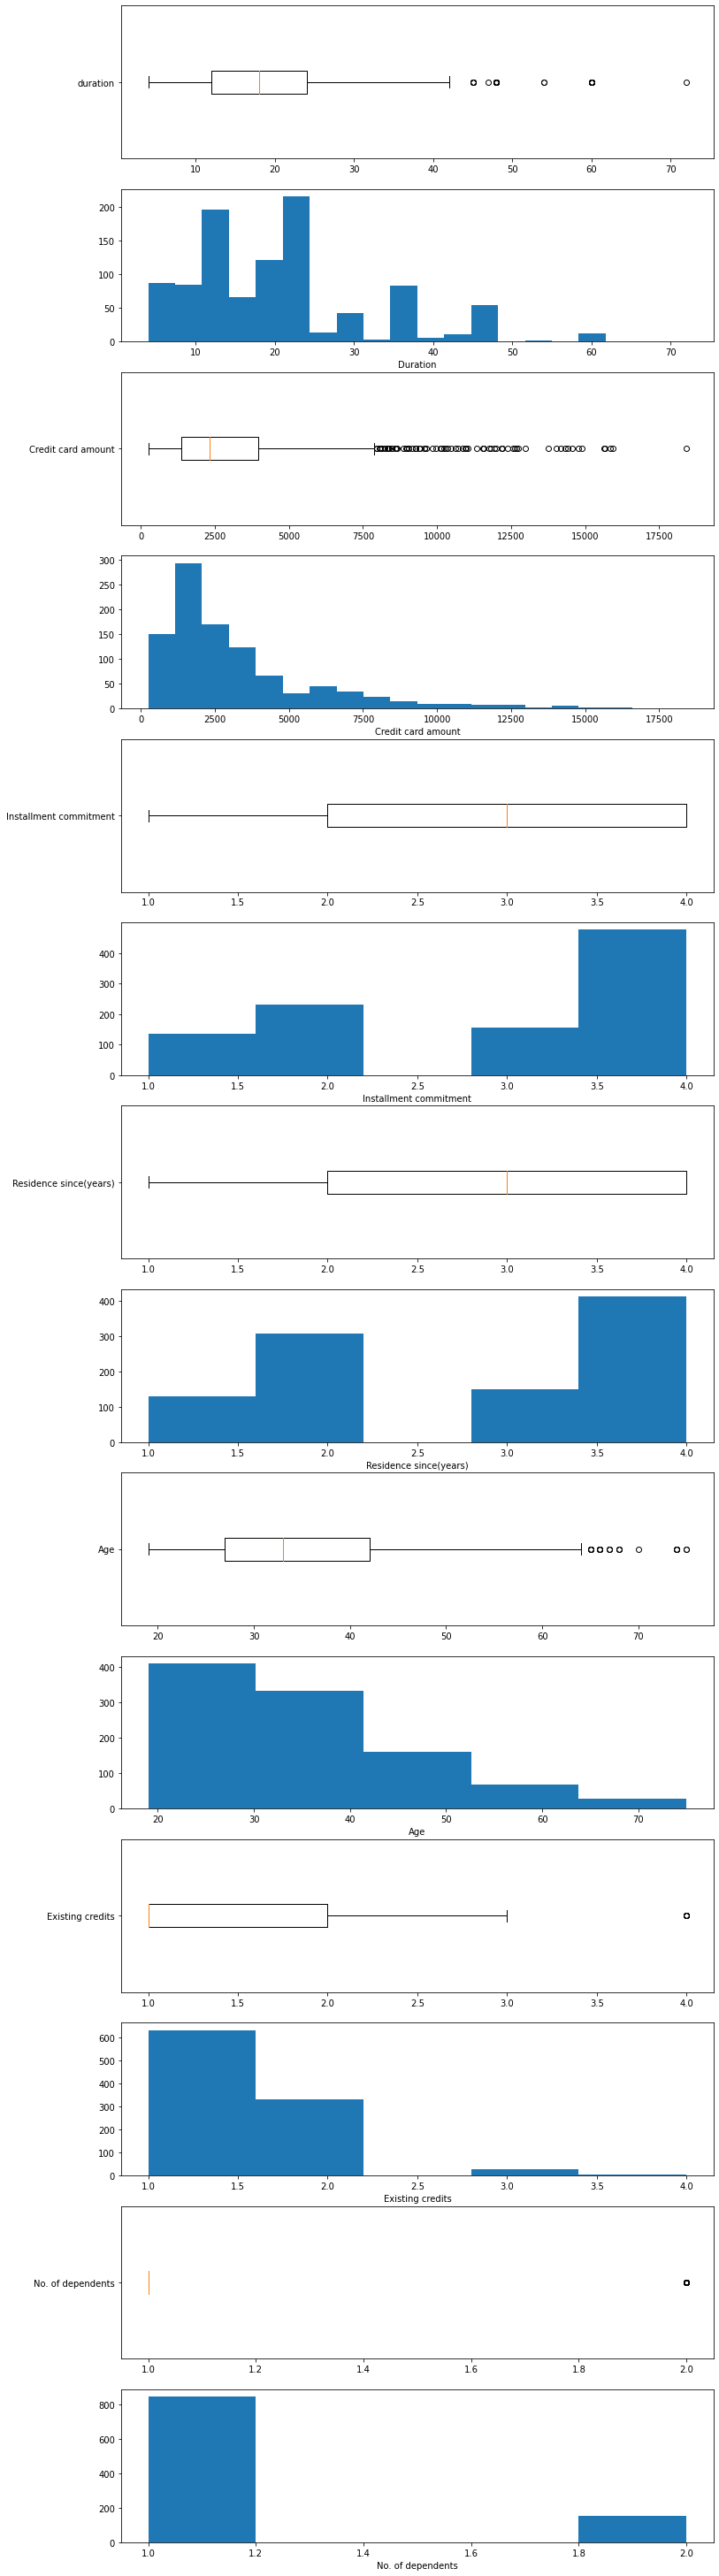

In [5]:
duration_data = credit_dataframe['duration']
credit_amt_data = credit_dataframe['credit_amount']
inst_data = credit_dataframe['installment_commitment']
years_data = credit_dataframe['residence_since']
age_data = credit_dataframe['age']
excredit_data = credit_dataframe['existing_credits']
dep_data = credit_dataframe['num_dependents']

plt.figure(figsize=(12, 40))

ax71 = plt.subplot(14, 1, 1)
ax71.boxplot(duration_data, vert=False)
ax71.set_yticklabels(['duration'])

ax72 = plt.subplot(14,1,2)
ax72.hist(duration_data, bins=20)
ax72.set_xlabel('Duration')

ax73 = plt.subplot(14, 1, 3)
ax73.boxplot(credit_amt_data, vert=False)
ax73.set_yticklabels(['Credit card amount'])

ax74 = plt.subplot(14, 1, 4)
ax74.hist(credit_amt_data, bins=20)
ax74.set_xlabel('Credit card amount')

ax75 = plt.subplot(14, 1, 5)
ax75.boxplot(inst_data, vert=False)
ax75.set_yticklabels(['Installment commitment'])

ax76 = plt.subplot(14,1,6)
ax76.hist(inst_data, bins=5)
ax76.set_xlabel('Installment commitment')

ax77 = plt.subplot(14, 1, 7)
ax77.boxplot(years_data, vert=False)
ax77.set_yticklabels(['Residence since(years)'])

ax78 = plt.subplot(14, 1, 8)
ax78.hist(years_data, bins=5)
ax78.set_xlabel('Residence since(years)')

ax79 = plt.subplot(14, 1, 9)
ax79.boxplot(age_data, vert=False)
ax79.set_yticklabels(['Age'])

ax710 = plt.subplot(14, 1, 10)
ax710.hist(age_data, bins=5)
ax710.set_xlabel('Age')

ax711 = plt.subplot(14, 1, 11)
ax711.boxplot(excredit_data, vert=False)
ax711.set_yticklabels(['Existing credits'])

ax712 = plt.subplot(14, 1, 12)
ax712.hist(excredit_data, bins=5)
ax712.set_xlabel('Existing credits')

ax713 = plt.subplot(14, 1, 13)
ax713.boxplot(dep_data, vert=False)
ax713.set_yticklabels(['No. of dependents'])

ax712 = plt.subplot(14, 1, 14)
ax712.hist(dep_data, bins=5)
ax712.set_xlabel('No. of dependents')


plt.subplots_adjust(top=1, bottom=0.004)
plt.show()

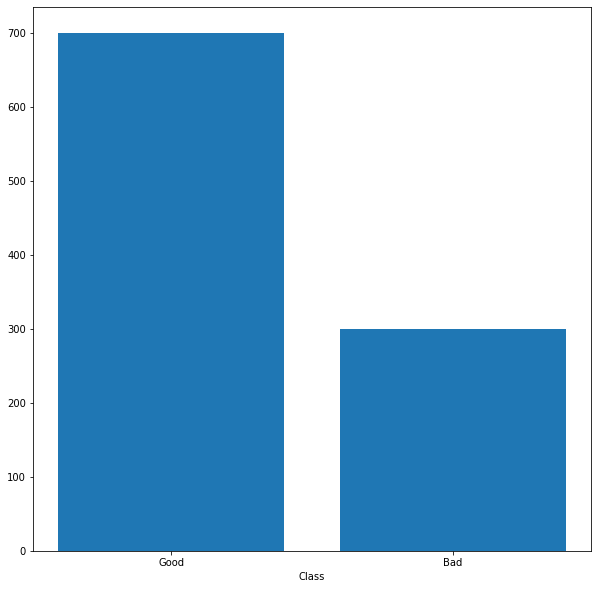

In [6]:
class_ = credit_dataframe['class']
num_good = class_[class_ == 'good']
num_bad = class_[class_ == 'bad']
labels = ['Good', 'Bad']
y_pos = np.arange(2)
x_values = [len(num_good), len(num_bad)]
plt.figure(figsize=(10, 10))
plt.bar(y_pos, x_values)
plt.xticks(np.arange(2), ('Good', 'Bad'))
plt.xlabel('Class')

plt.show()

### Part 3 : แปลงข้อมูล categorical variables ให้เป็นตัวเลขโดยให้เลือกใช้ OneHotEncoder จาก category_encoder package.

In [7]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\mawin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [8]:
import category_encoders as ce

credit_dataX, credit_datay = fetch_openml('credit-g', version='active', as_frame=True, return_X_y =True)
categorical_features = ['checking_status', 'credit_history', 'employment', 'foreign_worker',
'housing',
'job',
'other_parties',
'other_payment_plans',
'own_telephone',
'personal_status',
'property_magnitude',
'purpose',
'savings_status']

ce_ONE = ce.OneHotEncoder()
credit_dataX_encode = ce_ONE.fit_transform(credit_dataX)

credit_dataX_ordinal = credit_dataX.copy()
for feature in credit_dataX.iteritems():
  if feature[0] in categorical_features:
    credit_dataX_ordinal[feature[0]] = credit_dataX[feature[0]].astype("category").cat.codes

c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(


In [9]:
credit_dataX_encode.head()

,checking_status_1,checking_status_2,checking_status_3,checking_status_4,duration,credit_history_1,credit_history_2,credit_history_3,credit_history_4,credit_history_5,...,existing_credits,job_1,job_2,job_3,job_4,num_dependents,own_telephone_1,own_telephone_2,foreign_worker_1,foreign_worker_2
0,1,0,0,0,6.0,1,0,0,0,0,...,2.0,1,0,0,0,1.0,1,0,1,0
1,0,1,0,0,48.0,0,1,0,0,0,...,1.0,1,0,0,0,1.0,0,1,1,0
2,0,0,1,0,12.0,1,0,0,0,0,...,1.0,0,1,0,0,2.0,0,1,1,0
3,1,0,0,0,42.0,0,1,0,0,0,...,1.0,1,0,0,0,2.0,0,1,1,0
4,1,0,0,0,24.0,0,0,1,0,0,...,2.0,1,0,0,0,2.0,0,1,1,0


In [10]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

le = LabelEncoder()
y = le.fit_transform(credit_datay)

In [11]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score

# creating the training test split
X_train, X_test, y_train, y_test = train_test_split(credit_dataX_encode, y)


In [12]:
numeric_features = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']

### Part 4 : แบ่งข้อมูลที่แปลงได้ออกเป็น training และ testing set

In [13]:
# creating the training test split anew
X_trainval_pipe, X_test_pipe, y_trainval_pipe, y_test_pipe = train_test_split(credit_dataX, credit_datay)
# creating a Repeated Stratified K fold
skf = StratifiedKFold(n_splits=5, shuffle=True)

### Part 5 : สร้างโมเดลด้วย Logistic Regression, Linear support vector machines และ k-nearest neighbors และประเมินผลด้วย training data โดยเปรียบเทียบผลลัพธ์ที่ได้ของทั้งสามโมเดล

Logistic Regression

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

preprocess_lr = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_lr = make_pipeline(preprocess_lr, LogisticRegression())
model_lr.fit(X_trainval_pipe, y_trainval_pipe)
scores_lr = cross_val_score(model_lr, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lr)))

score: 0.743


Linear support vector machines

In [15]:
from sklearn.svm import LinearSVC

preprocess_svc = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_svc = make_pipeline(preprocess_svc, LinearSVC())
model_svc.fit(X_trainval_pipe, y_trainval_pipe)
scores_svc = cross_val_score(model_svc, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svc)))

score: 0.747


k-nearest neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

preprocess_knn = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_knn = make_pipeline(preprocess_knn, KNeighborsClassifier())
model_knn.fit(X_trainval_pipe, y_trainval_pipe)
scores_knn = cross_val_score(model_knn, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knn)))

score: 0.707


### Part 6 : แปลง scale ข้อมูลที่เป็น continuousfeatures ด้วย StandardScaler และเปรียบเทียบผลลัพธ์ที่ได้ของทั้งสามโมเดล

In [17]:
scaler = StandardScaler()
X_train_scaled = X_train
X_train_scaled[numeric_features] = scaler.fit_transform(X_train_scaled[numeric_features])

X_train_scaled.head()

,checking_status_1,checking_status_2,checking_status_3,checking_status_4,duration,credit_history_1,credit_history_2,credit_history_3,credit_history_4,credit_history_5,...,existing_credits,job_1,job_2,job_3,job_4,num_dependents,own_telephone_1,own_telephone_2,foreign_worker_1,foreign_worker_2
776,0,0,1,0,1.282838,1,0,0,0,0,...,1.028393,1,0,0,0,-0.434269,1,0,1,0
742,0,0,1,0,0.013539,0,1,0,0,0,...,-0.700967,1,0,0,0,-0.434269,1,0,1,0
940,0,0,1,0,-0.748040,0,1,0,0,0,...,-0.700967,0,0,1,0,2.302720,1,0,1,0
697,0,0,1,0,-0.748040,1,0,0,0,0,...,-0.700967,0,0,0,1,-0.434269,0,1,1,0
518,1,0,0,0,-1.255760,0,1,0,0,0,...,-0.700967,1,0,0,0,-0.434269,1,0,1,0


In [18]:
preprocess_lrs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lrs = make_pipeline(preprocess_lrs, LogisticRegression())
model_lrs.fit(X_trainval_pipe, y_trainval_pipe)
scores_lrs = cross_val_score(model_lrs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lrs)))

score: 0.760


In [19]:
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC( max_iter=5000))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svcs)))

score: 0.753


In [20]:
preprocess_knns = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_knns = make_pipeline(preprocess_knns, KNeighborsClassifier())
model_knns.fit(X_trainval_pipe, y_trainval_pipe)
scores_knns = cross_val_score(model_knns, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knns)))

score: 0.707


### Part 7 : ให้ลองปรับค่า parameters ด้วยการใช้ GridSearchCV แล้วดูว่าผลลัพธ์ดีขึ้นหรือไม่ ให้ประเมินผลด้วยข้อมูล test set แสดงประสิทธิภาพของฟังก์ชันด้วยการกราฟเปรียบเทียบของทั้งสามโมเดล

In [21]:
X_trainval, X_test, y_trainval, y_test = train_test_split(credit_dataX_ordinal, y)

In [22]:
from sklearn.model_selection import GridSearchCV

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {"logisticregression__C" : np.logspace(-4, 20, 20)}
grid_lr = GridSearchCV(lr_pipe, param_grid, cv=skf, return_train_score=True)
grid_lr.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))

best mean cross-validation score: 0.749
best parameters: {'logisticregression__C': 0.615848211066026}


In [23]:
preprocess_lrs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lrs = make_pipeline(preprocess_lrs, LogisticRegression(C=0.615848211066026))
model_lrs.fit(X_trainval_pipe, y_trainval_pipe)
scores_lrs = cross_val_score(model_lrs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lrs)))
print("test-set score: {:.3f}".format(grid_lr.score(X_test, y_test)))

score: 0.761
test-set score: 0.776


In [24]:
svc_pipe = make_pipeline(StandardScaler(), LinearSVC())
param_grid = {'linearsvc__C': np.logspace(-10, 5, 20)}
grid_svc = GridSearchCV(svc_pipe, param_grid, cv=skf, scoring='accuracy', return_train_score=True)
grid_svc.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svc.best_score_))
print("best parameters: {}".format(grid_svc.best_params_))

c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

best mean cross-validation score: 0.764
best parameters: {'linearsvc__C': 0.007847599703514624}


c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC(C=0.007847599703514624))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svcs)))
print("test-set score: {:.3f}".format(grid_svc.score(X_test, y_test)))

score: 0.745
test-set score: 0.784


In [26]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(10, 20)}
grid = GridSearchCV(knn_pipe, param_grid, cv=skf, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.740
best parameters: {'kneighborsclassifier__n_neighbors': 10}


In [36]:
preprocess_knns = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_knns = make_pipeline(preprocess_knns, KNeighborsClassifier(n_neighbors=10))
model_knns.fit(X_trainval_pipe, y_trainval_pipe)
scores_knns = cross_val_score(model_knns, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knns)))

score: 0.725


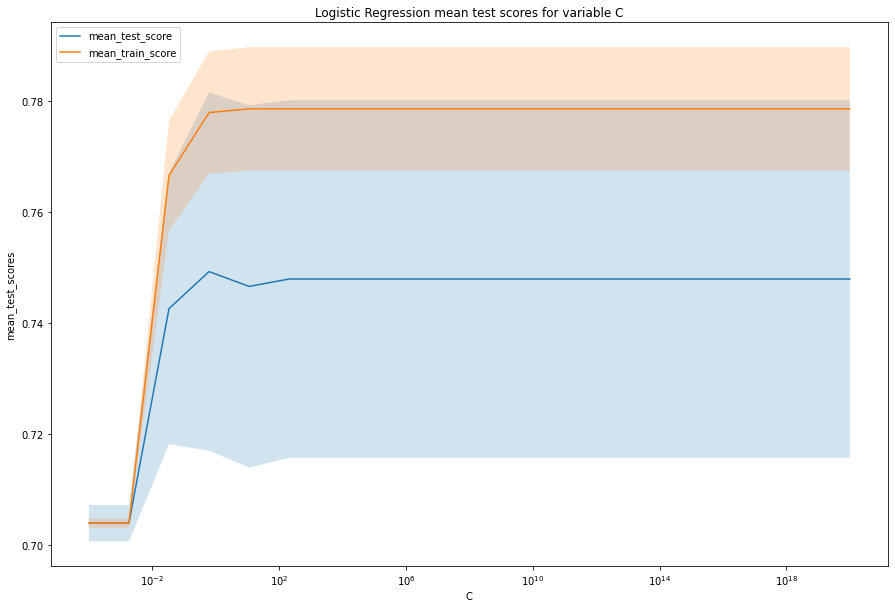

In [28]:
import numpy as np

lr_cvalues = np.logspace(-4, 20, 20)
lr_mean_test_scores = np.asarray(grid_lr.cv_results_['mean_test_score'])
lr_mean_train_scores = np.asarray(grid_lr.cv_results_['mean_train_score'])
std_test = np.asarray(grid_lr.cv_results_['std_test_score'])
std_train = np.asarray(grid_lr.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(lr_cvalues, lr_mean_test_scores, label='mean_test_score')
ax.plot(lr_cvalues, lr_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(lr_cvalues, lr_mean_test_scores + std_test, lr_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(lr_cvalues, lr_mean_train_scores+std_train, lr_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='Logistic Regression mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

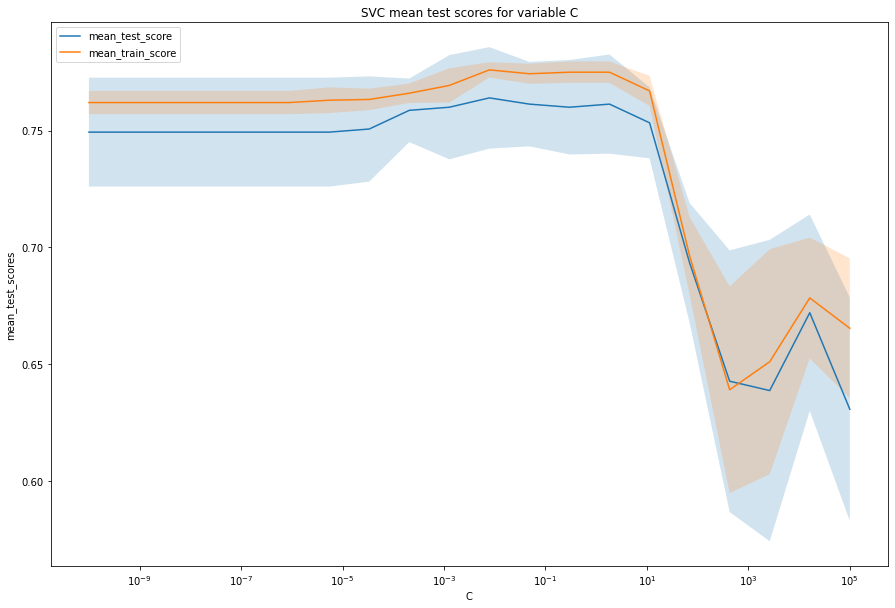

In [41]:
svc_c_values = np.logspace(-10, 5, 20)
svc_mean_test_scores = np.asarray(grid_svc.cv_results_['mean_test_score'])
svc_mean_train_scores = np.asarray(grid_svc.cv_results_['mean_train_score'])
std_test = np.asarray(grid_svc.cv_results_['std_test_score'])
std_train = np.asarray(grid_svc.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(svc_c_values, svc_mean_test_scores, label='mean_test_score')
ax.plot(svc_c_values, svc_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(svc_c_values, svc_mean_test_scores + std_test, svc_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(svc_c_values, svc_mean_train_scores+std_train, svc_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='SVC mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

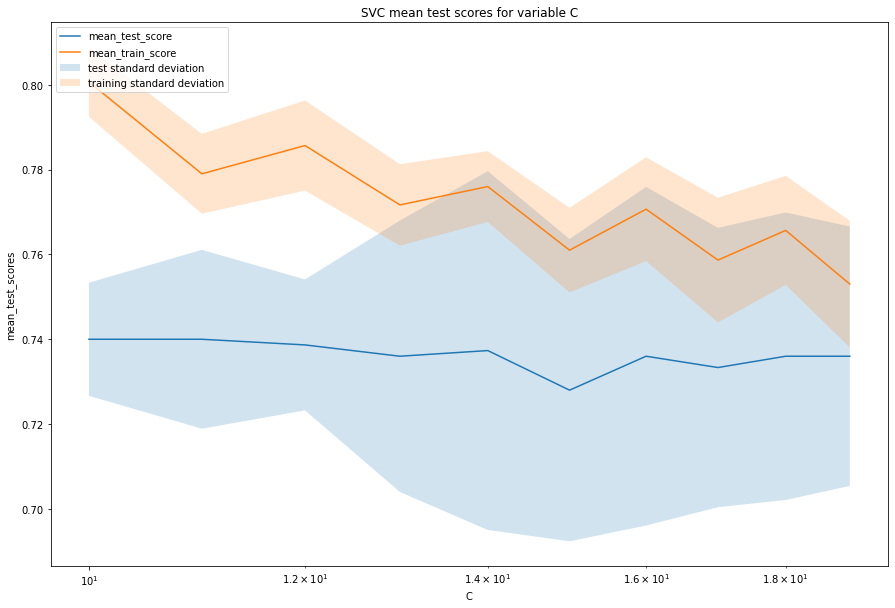

In [37]:
knn_c_values = range(10, 20)
knn_mean_test_scores = np.asarray(grid.cv_results_['mean_test_score'])
knn_mean_train_scores = np.asarray(grid.cv_results_['mean_train_score'])
std_test = np.asarray(grid.cv_results_['std_test_score'])
std_train = np.asarray(grid.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(knn_c_values, knn_mean_test_scores, label='mean_test_score')
ax.plot(knn_c_values, knn_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(knn_c_values, knn_mean_test_scores + std_test, knn_mean_test_scores - std_test, alpha=0.2, label='test standard deviation')
ax.fill_between(knn_c_values, knn_mean_train_scores+std_train, knn_mean_train_scores-std_train, alpha=0.2, label='training standard deviation')

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='SVC mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

### Part 8 : ให้แสดงรูปของค่า coefficients 20 ตัว ที่สําคัญที่สุดของ LogisticRegression และ Linear Support Vector Machines ที่ใช้ค่า hyper-parameters ที่ดีที่สุดที่ได้จากการทํา grid search

In [31]:
categorical_fe = credit_dataX[categorical_features]
enc = OneHotEncoder()
enc.fit_transform(categorical_fe)
encoded_categories = list(enc.get_feature_names(categorical_features))
all_features = numeric_features + encoded_categories

c:\Users\mawin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
plr = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
mlr = make_pipeline(plr, LogisticRegression(C=0.03359818286283781))
mlr.fit(X_trainval_pipe, y_trainval_pipe)
coefficients = mlr.steps[1][1].coef_

In [33]:
coeff_tuples = []
for index, coeff in enumerate(coefficients[0]):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])

In [34]:
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
# map indices to column names
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

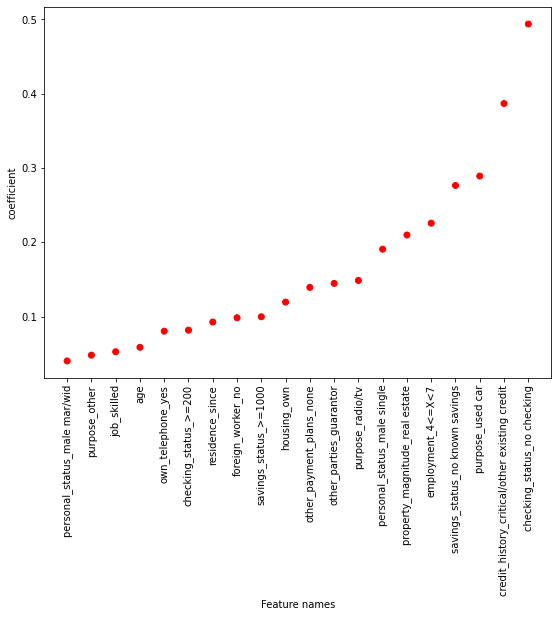

In [35]:
coeffs = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()

In [38]:
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC(C=0.04832930238571752))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
coefficients = model_svcs.steps[1][1].coef_

In [39]:
coeff_tuples = []
for index, coeff in enumerate(coefficients[0]):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

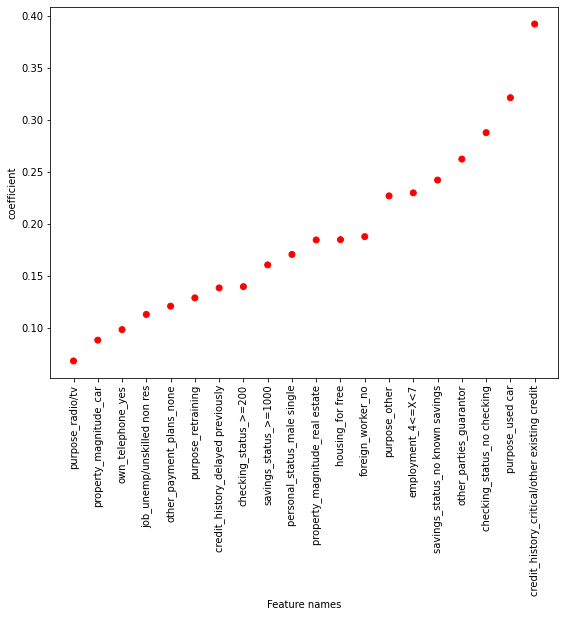

In [40]:
plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()